In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.figsize'] = (12, 6)

In [3]:
data = pd.read_pickle('nsfg_data.pkl')

In [4]:
live = data[data.outcome == 1]

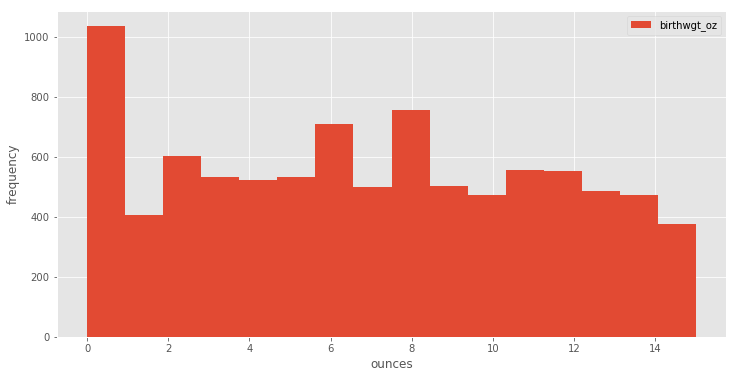

In [8]:
live.birthwgt_oz.plot.hist(bins=16, legend=True)
plt.xlabel('ounces')
plt.ylabel('frequency')

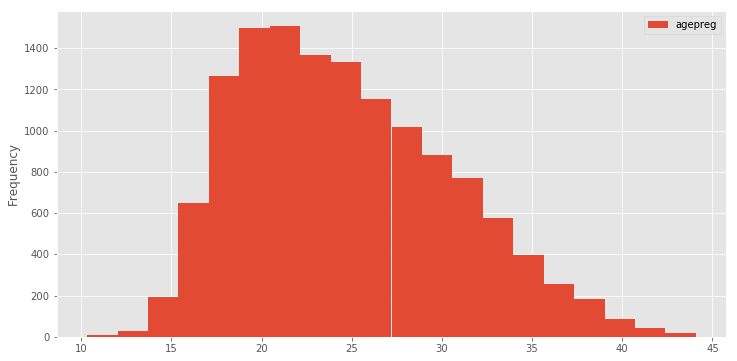

In [9]:
data.agepreg.plot.hist(bins=20, legend=True)

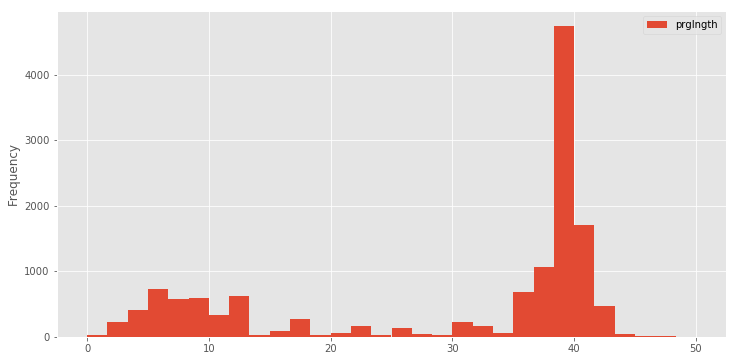

In [10]:
data.prglngth.plot.hist(bins=30, legend=True)

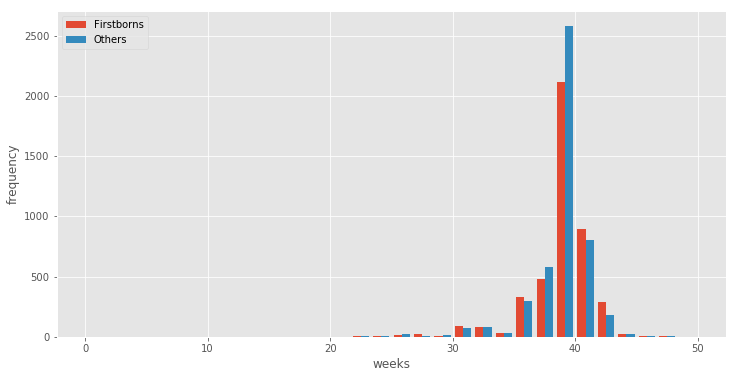

In [11]:
# Check pregnancy lengths for 1stborns Vs others

firsts = live[live.birthord == 1] 
others = live[live.birthord != 1]

plt.hist((firsts.prglngth.dropna(),others.prglngth.dropna()), bins=30, label=('Firstborns', 'Others'))
plt.xlabel('weeks')
plt.ylabel('frequency')
plt.legend(loc=2)

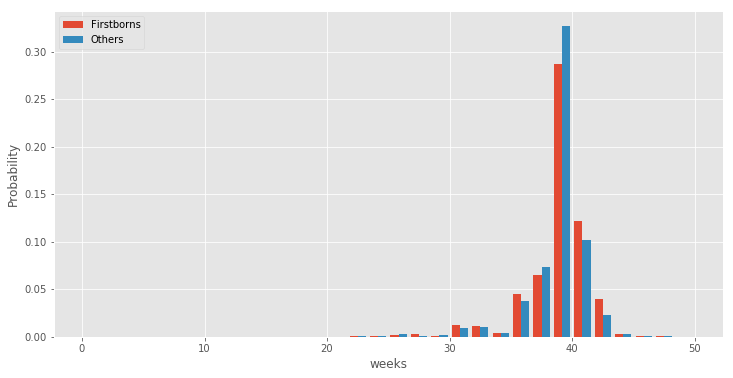

In [12]:
# Probability Mass Function for
# pregnancy lengths for 1stborns Vs others

plt.hist((firsts.prglngth.dropna(),others.prglngth.dropna()), bins=30, normed=True, label=('Firstborns', 'Others'))
plt.xlabel('weeks')
plt.ylabel('Probability')
plt.legend(loc=2)

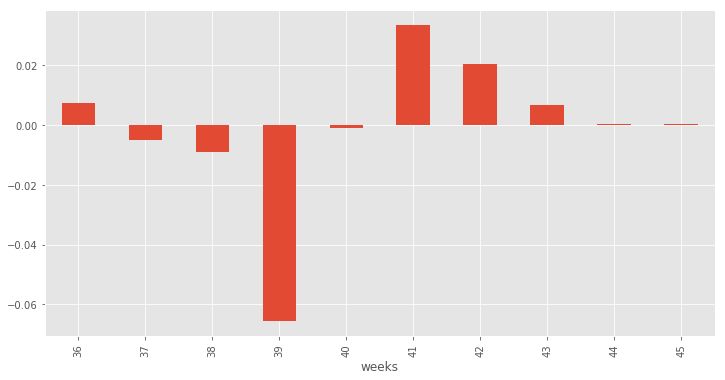

In [13]:
#%% Difference, in percentage points, by week.

firsts_probs = firsts.prglngth.value_counts().sort_index().loc[36:45] / len(firsts)
others_probs = others.prglngth.value_counts().sort_index().loc[36:45] / len(others)
prg_prob_diff = firsts_probs - others_probs

fig = plt.figure()
ax = fig.add_subplot(111)
prg_prob_diff.plot.bar()
#ax.set_xlim((21, 32))
plt.xlabel('weeks')


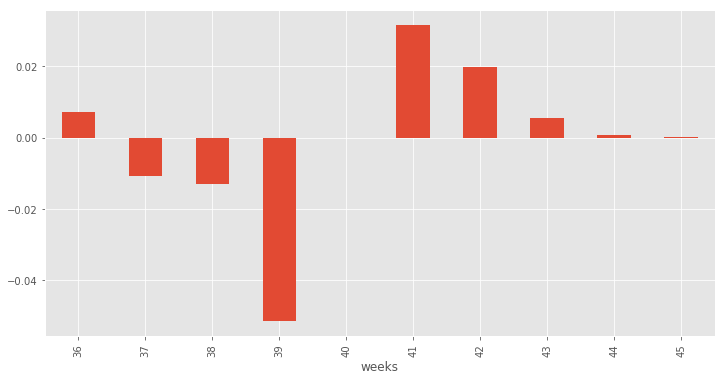

In [14]:
#%% Only select women who have at least 2 babies
multi_firsts = firsts[firsts.caseid.isin(others.caseid)]

multi_firsts_probs = multi_firsts.prglngth.value_counts().sort_index().loc[36:45] / len(multi_firsts)
others_probs = others.prglngth.value_counts().sort_index().loc[36:45] / len(others)
multi_prg_prob_diff = multi_firsts_probs - others_probs

fig = plt.figure()
ax = fig.add_subplot(111)
multi_prg_prob_diff.plot.bar()
#ax.set_xlim((21, 32))
plt.xlabel('weeks')

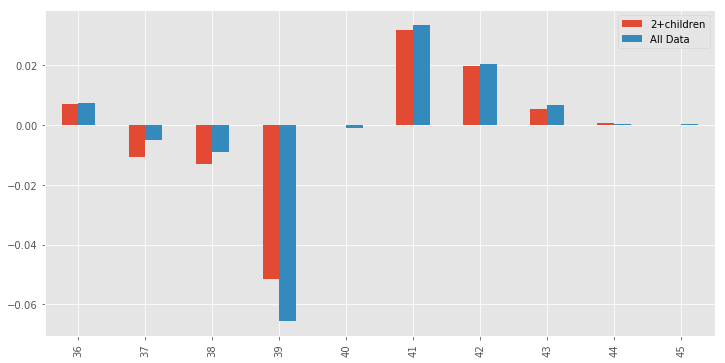

In [15]:
df = pd.DataFrame({'All Data':prg_prob_diff, '2+children':multi_prg_prob_diff})

df.plot.bar()